# Exam 1- Higgs ML Challenge

The HiggsML challenge was organized by ATLAS colleagues and ran on Kaggle's platform. The challenge provided a training and test set of Higgs and background events in CSV format. Using this data, participants were tasked with creating a classifier, which they submitted to Kaggle. Kaggle evaluated the classifier against another test set. At the end of the competition, the best performing classifiers were awarded a cash prize.

We will run a mini-competition, using the same data, as your first exam. Note that you will not need a Kaggle account, but may wish to get one to get more details.

The challenge is described in https://higgsml.lal.in2p3.fr

The Kaggle site is https://www.kaggle.com/c/higgs-boson

Detail description of the data and challenge: https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

You are welcome to use Scikit or any other package you like.

Please separate different steps into different Jupyter Notebooks. For example:

    - Convert CSV to h5 format.
    - Load data and plot/compare variables.
    - Setup and Train the Classifier. Save the trained classifier (see http://scikit-learn.org/stable/modules/model_persistence.html )
    - Evaluate and compare different classifiers using ROC curves and metric defined by competition.

A copy of the data CSV files are on the cluster at: /data/afarbin/DLClass/HiggsML


In [60]:
!ls /data/afarbin/DLClass/HiggsML

Exam 1.ipynb  test.csv	training.csv


Note that the first line of the file contains the variable names:

In [61]:
!head -2  /data/afarbin/DLClass/HiggsML/training.csv

EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331133733,s


Some basic shell commands may help you. For example here is the number of lines (so N Events + variable names):

In [62]:
!wc -l /data/afarbin/DLClass/HiggsML/test.csv
!wc -l /data/afarbin/DLClass/HiggsML/training.csv

550001 /data/afarbin/DLClass/HiggsML/test.csv
250001 /data/afarbin/DLClass/HiggsML/training.csv


In [63]:
!tail -250000 /data/afarbin/DLClass/HiggsML/training.csv > mytraining.csv

In [64]:
!head -2 mytraining.csv

100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331133733,s
100001,160.937,68.768,103.235,48.146,-999.0,-999.0,-999.0,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226,2.23358448717,b


In [163]:
temp_Var= "EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label"
E_var_names_w_y_i = temp_Var.split(',')
var_names_i = E_var_names_w_y_i[1:31]
raw_i=var_names_i[:13]
der_i=var_names_i[13:30]
w_i = E_var_names_w_y_i[31:32]
y_i=E_var_names_w_y_i[32:]

In [164]:
import pandas as pd
filename = "mytraining.csv"
df = pd.read_csv(filename,names=E_var_names_w_y_i)


In [165]:
import numpy as np
total_weight=np.sum(df.Weight)
total_weight

411691.83592957398

# Run 1 Removing the missing value


In [166]:
#removing eventid,and data with -999.000 points nad cahanging s to 1 and b to 0
df =df.drop(["EventId"],axis=1)
df = df[df.DER_deltaeta_jet_jet != -999.000]
df = df[df.DER_mass_MMC != -999.000]
df.Label.replace(to_replace=dict(b=0,s=1),inplace=True)

In [167]:
print "min. values"
print df.min()


min. values
DER_mass_MMC                     9.878000
DER_mass_transverse_met_lep      0.000000
DER_mass_vis                     7.330000
DER_pt_h                         0.120000
DER_deltaeta_jet_jet             0.000000
DER_mass_jet_jet                13.602000
DER_prodeta_jet_jet            -18.066000
DER_deltar_tau_lep               0.228000
DER_pt_tot                       0.004000
DER_sum_pt                     110.601000
DER_pt_ratio_lep_tau             0.047000
DER_met_phi_centrality          -1.414000
DER_lep_eta_centrality           0.000000
PRI_tau_pt                      20.000000
PRI_tau_eta                     -2.496000
PRI_tau_phi                     -3.141000
PRI_lep_pt                      26.001000
PRI_lep_eta                     -2.487000
PRI_lep_phi                     -3.142000
PRI_met                          0.200000
PRI_met_phi                     -3.142000
PRI_met_sumet                   34.323000
PRI_jet_num                      2.000000
PRI_jet_leading_pt    

In [168]:
from sklearn import preprocessing


In [169]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
sig_only = df[df.Label==1]
bkg_only = df[df.Label==0]
sig_weight=sig_only["Weight"]
bkg_weight= bkg_only["Weight"]


In [171]:
#defining the input feature(X),weight and the output Y
feature = df.drop(["Weight","Label"],axis=1)
Y=df.loc[:,"Label":]
weight=df.loc[:,"Weight"]


In [172]:
n_train=61330

train_sample=df[:n_train]
test_sample=df[n_train:]

train_weight=np.array(weight[:n_train])
test_weight= np.array(weight[n_train:])

X_Train = train_sample[var_names_i[:30]]
y_Train = train_sample["Label"]

X_Test = test_sample[var_names_i[:30]]
y_Test = test_sample["Label"]

Test_sig=test_sample[test_sample.Label==1]
Test_bkg=test_sample[test_sample.Label==0]


#y_sample =(Y.values>"b")
#y_train=np.array(y_sample[:n_train],dtype="int")
#y_train=np.reshape(y_train,(5120,))

#y_test=np.array(y_sample[n_train:],dtype="int")
#y_test=np.reshape(y_test,(1707,))



In [173]:
srinken_weight = np.sum(train_weight)+np.sum(test_weight)
srinken_weight

30364.374733890625

In [174]:
def ams(s,b):
   
    return np.sqrt (2.*( (s + b + 10.)*np.log(1.+s/(b+10.))-s))

# Using DecisionTreeClassifier

In [175]:
from sklearn import tree
from sklearn.metrics import accuracy_score
clt = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=100,min_samples_leaf=250,criterion="gini")

In [176]:
clt = clt.fit(X_Train,y_Train)

In [177]:
clt_test = clt.predict(X_Test)

In [178]:
accuracy_score(clt_test,y_Test)

0.80542452830188682

In [179]:
tpr_w = test_weight*(y_Test==1)
s=np.sum(tpr_w*(clt_test==1))

fpr_w = test_weight*(y_Test==1)
b=np.sum(fpr_w*(clt_test==0))

The AMS VALUE


In [180]:
a = ams(s,b)
a

2.0912368499277667

# Using RidgeClassifier

In [181]:
from sklearn import linear_model
reg = linear_model.RidgeClassifier(alpha=0.01)


In [182]:
reg.fit(X_Train,y_Train)

RidgeClassifier(alpha=0.01, class_weight=None, copy_X=True,
        fit_intercept=True, max_iter=None, normalize=False,
        random_state=None, solver='auto', tol=0.001)

In [183]:
reg_test = reg.predict(X_Test)
accuracy_score(reg_test,y_Test)


0.72729952830188682

In [184]:

tpr_w_r = test_weight*(y_Test==1.0)
s = np.sum(tpr_w_r*(reg_test==1.0))


fpr_w_r = test_weight*(y_Test==1.0)
b = np.sum(fpr_w_r*(reg_test==0.0))

THE AMS VALUE

In [185]:
b =ams(s,b)
b

1.5104862843612077

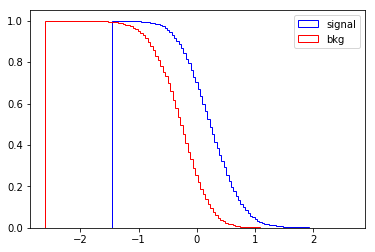

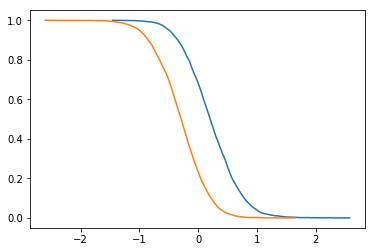

In [187]:
s,s_b,_=plt.hist(reg.decision_function(Test_sig.iloc[:,:30]),bins=100,histtype="step", color="blue", label="signal",cumulative=-1,stacked=True,normed=True)
b,b_s,_=plt.hist(reg.decision_function(Test_bkg.iloc[:,:30]),bins=100,histtype="step", color="red", label="bkg",cumulative=-1,stacked=True,normed=True)
plt.legend(loc="upper right")
plt.show()
plt.plot(s_b[:-1],s)
plt.plot(b_s[:-1],b)
plt.show()

Lasso

In [406]:
from sklearn import linear_model
lasso = linear_model.Lasso()

In [407]:
lasso.fit(X_Train,y_Train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [408]:
lasso_test = lasso.predict(X_Test)
lasso_test = np.array(lasso_test>0.5,dtype='int')

In [409]:
accuracy_score(lasso_test,y_Test)

0.69015330188679247

In [410]:
tpr_w_lasso = test_weight*(y_Test==1.0)
s = sum(tpr_w_lasso*(lasso_test==1.0))


fpr_w_lasso = test_weight*(y_Test==1.0)
b = sum(fpr_w_lasso*(lasso_test==0.0))

THE AMS VALUE

In [412]:
c =ams(s,b)
c

0.93613084820957049

# Run 2 Keeping the missing value and using RobustScale to deal with those

In [140]:
import pandas as pd
filename = "mytraining.csv"
df_1 = pd.read_csv(filename,names=E_var_names_w_y_i)
df_1 =df_1.drop(["EventId"],axis=1)
df_1.Label.replace(to_replace=dict(b=0,s=1),inplace=True)

In [141]:
import numpy as np
from sklearn.preprocessing import RobustScaler
R = RobustScaler(with_centering=False,)
R.fit(df)



RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=False,
       with_scaling=True)

In [142]:
x = R.transform(df_1)

In [143]:
data = pd.DataFrame(x)
bloted_total_weight = np.sum(data.iloc[:,30:31])
bloted_total_weight

30    554427.138815
dtype: float64

In [144]:
n_train=225000

train_sample=data[:n_train]
test_sample=data[n_train:]


train_weight=np.array(train_sample.iloc[:,30:31])
test_weight= np.array(test_sample.iloc[:,30:31])

X_train = np.array(train_sample.iloc[:,0:30])

y_train = np.array(train_sample.iloc[:,31:])

X_test = np.array(test_sample.iloc[:,0:30])

y_test = np.array(test_sample.iloc[:,31:])

Test_sig=np.array(X_test == 1,dtype="int")
Test_bkg=np.array(X_test == 0,dtype="int")



In [145]:
np.shape(y_train)

(225000, 1)

Using Deciscion Tree

In [146]:
from sklearn import tree
from sklearn.metrics import accuracy_score
clt = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=100,min_samples_leaf=250,criterion="gini")
clt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=250, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [147]:
clt_test =clt.predict(X_test)
accuracy_score(clt_test,y_test)


0.80479999999999996

In [148]:
tpr_w = test_weight*(y_test==1)
s=np.sum(tpr_w*(clt_test==1))

fpr_w = test_weight*(y_test==1)
b=np.sum(fpr_w*(clt_test==0))

In [149]:
AMS = ams(s,b)
AMS

558.44060891959111

Using RidgeClassifier 

In [153]:
from sklearn import linear_model
reg = linear_model.RidgeClassifier(alpha=0.01)

reg.fit(X_train,y_train.ravel())

RidgeClassifier(alpha=0.01, class_weight=None, copy_X=True,
        fit_intercept=True, max_iter=None, normalize=False,
        random_state=None, solver='auto', tol=0.001)

In [154]:
reg_test = reg.predict(X_test)
accuracy_score(reg_test,y_test)


0.74431999999999998

In [155]:

s_r_l=np.sum(test_weight*(y_test==1)*(reg_test==1))



In [156]:
b_r_l=np.sum(test_weight*(y_test==1)*(reg_test==0))

In [157]:
P = ams(s_r_l,b_r_l)

In [158]:
P

423.39326942376681

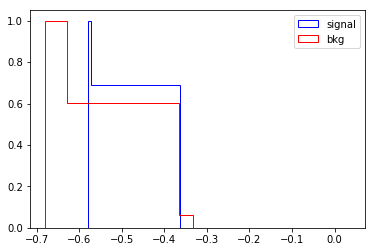

In [161]:
s,s_b,_=plt.hist(reg.decision_function(Test_sig),bins=100,histtype="step", color="blue", label="signal",cumulative=-1,stacked=True,normed=True)
b,b_s,_=plt.hist(reg.decision_function(Test_bkg),bins=100,histtype="step", color="red", label="bkg",cumulative=-1,stacked=True,normed=True)
plt.legend(loc="upper right")
plt.show()